# In-vivo evidence for increased tau deposition in temporal lobe epilepsy

## Content
1.  *Figure 1:* Mapping of tau uptake in TLE
1. Supplementary figures

# **Figure 1:** Mapping of tau uptake in TLE



In [1]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from brainspace.plotting import plot_hemispheres
from osfclient import OSF

# Load utilities functions from utils.py
from utils import *

### Fetch data

In [2]:
osf_path="/Users/rcruces/Desktop/OSF_data_revision-2025"

# Load the data frame
#osf_df = osf_download("18F-MK6240_in-vivo_database.csv", project_id='ct3gw')
#df = pd.read_csv(osf_df)
df = pd.read_csv(f"{osf_path}/18F-MK6240_in-vivo_database_osf.csv")

# Load processed 18F-MK6240 PET data | matrix:{vertices x subjects}
#osf_pet_raw = osf_download("surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy", project_id='ct3gw')
#pet_raw = np.load(osf_pet_raw)
pet_raw = np.load(f"{osf_path}/surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy")

# Load the cortical thickness data | matrix:{vertices x subjects}
#osf_cth_raw = osf_download("surf-fsLR-32k_desc-GroupData_smooth-20mm_thickness.npy", project_id='ct3gw')
#cth_raw = np.load(osf_cth_raw)
cth_raw = np.load(f"{osf_path}/surf-fsLR-32k_desc-GroupData_smooth-20mm_thickness.npy")

# Load fsLR-32 surface
fslr32k_lh = fetch_surface('fsLR-32k.L.surf.gii')
fslr32k_rh = fetch_surface('fsLR-32k.R.surf.gii')
fslr32k = fetch_template_surface("fslr32k", join=True)

# Load fsLR-32k middle wall mask
fslr32k_mask = fetch_mask("fslr32k")

### Sort the matrices into ipsilateral/contralateral relative to seizure focus

In [3]:
# fsLR-32k length
n_64k = pet_raw.shape[1]
n_32k = int(n_64k/2)

# Flip R >> L 18F-mk6240
mk_ipsi, mk_contra = flip_mat(pet_raw[:,0:n_32k], pet_raw[:,n_32k:n_64k], df['lateralization'].values, flip='R')

# Flip R >> L Thickness
th_ipsi, th_contra = flip_mat(cth_raw[:,0:n_32k], cth_raw[:,n_32k:n_64k], df['lateralization'].values, flip='R')

# Merge ipsi and contra
tauMK6240 = np.concatenate((mk_ipsi, mk_contra), axis=1)
thickness = np.concatenate((th_ipsi, th_contra), axis=1)


Flipping data from Right to Left
Flipping data from Right to Left


## Participants


In [4]:
# Create a cross-tabulation of 'group' and 'mk6240.session'
cross_tab = pd.crosstab(df['group'], df['mk6240.session'], margins=False)

# Print the result in a nice pandas format
display(cross_tab)

mk6240.session   1   2
group                 
Healthy         28   7
Patient         28  13

In [5]:
df

id participant_id  mk6240.session  mk6240.Tdiff sex  age  age.mri1  \
0   hc01_01           hc01               1             0   M   38        36   
1   hc01_02           hc01               2            42   M   41        36   
2   hc02_01           hc02               1             0   M   37        36   
3   hc03_01           hc03               1             0   M   30        29   
4   hc03_02           hc03               2            28   M   33        29   
..      ...            ...             ...           ...  ..  ...       ...   
71  px24_01           px24               1             0   F   31        30   
72  px25_01           px25               1             0   F   35        35   
73  px26_01           px26               1             0   F   47        46   
74  px27_01           px27               1             0   F   61        60   
75  px28_01           px28               1             0   F   50        50   

   handedness Language    group  ... suvr.ipsi.putamen  suvr.cntr.putamen  \
0           R       en  Healthy  ...          0.307187           0.369885   
1           R       en  Healthy  ...          0.325089           0.380383   
2           R       en  Healthy  ...          0.724208           0.765012   
3           R       en  Healthy  ...          0.365219           0.396090   
4           R       en  Healthy  ...          0.416148           0.447809   
..        ...      ...      ...  ...               ...                ...   
71          R       en  Patient  ...          0.481082           0.430773   
72          R       fr  Patient  ...          0.366626           0.418259   
73          R       fr  Patient  ...          0.459007           0.506652   
74          R       en  Patient  ...          0.502339           0.524614   
75          R       fr  Patient  ...          0.570046           0.584684   

    suvr.ipsi.pallidus suvr.cntr.pallidus suvr.ipsi.hippocampus  \
0             0.327113           0.288889              0.648649   
1             0.258543           0.341217              0.744042   
2             0.659863           0.798234              1.022413   
3             0.458030           0.295520              0.752263   
4             0.491404           0.423119              0.810138   
..                 ...                ...                   ...   
71            0.000000           0.615176              0.805197   
72            0.203293           0.681228              0.823647   
73            0.716451           0.672009              0.721280   
74            0.736676           0.624700              0.831893   
75            1.557789           0.296837              0.904801   

   suvr.cntr.hippocampus suvr.ipsi.amygdala  suvr.cntr.amygdala  \
0               0.631116           0.542001            0.680289   
1               0.610274           0.528940            0.634286   
2               1.072643           0.731697            0.981487   
3               0.788010           0.524334            0.646241   
4               0.917867           0.498872            0.877779   
..                   ...                ...                 ...   
71              0.826743           0.558398            0.650071   
72              0.804186           0.673539            0.754230   
73              0.689479           0.615287            0.606119   
74              0.975284           0.628033            0.865820   
75              1.000014           0.781870            0.701785   

   suvr.ipsi.accumbens  suvr.cntr.accumbens  
0             0.533554             0.615457  
1             0.499043             0.543102  
2             1.078222             1.152914  
3             0.408141             0.429552  
4             0.350618             0.377261  
..                 ...                  ...  
71            0.520951             0.560653  
72            0.551707             0.616050  
73            0.356072             0.559987  
74            0.595008             0.646290  
75            0.563

------------------------
### A | Mean Tau 18F-MK6240 uptake by group

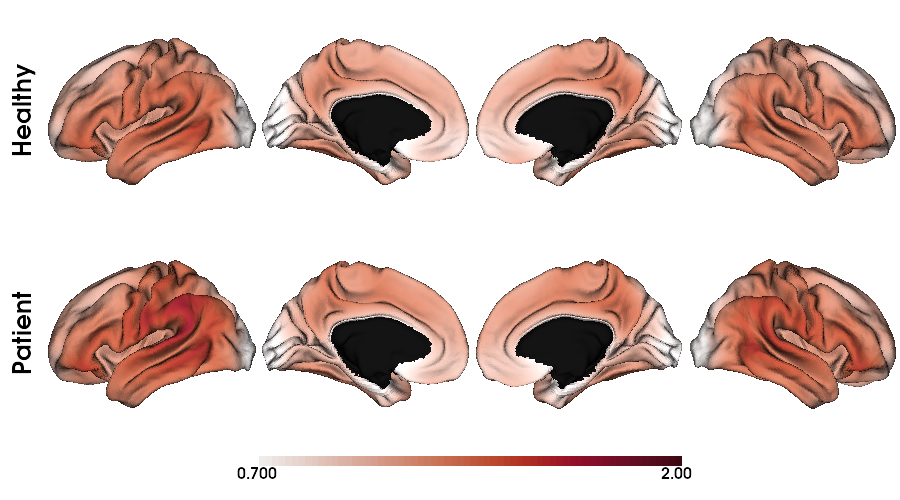

In [6]:
# plot data
plot_ctx_groups(fslr32k_lh, fslr32k_rh, tauMK6240, df , color_range=(0.7, 2), Col='cmo.amp', mask=fslr32k_mask, 
                scale=1, Save=False)


### B.1 | Tau 18F-MK6240 uptake group difference

Y ~ group + age + sex + 1/subject


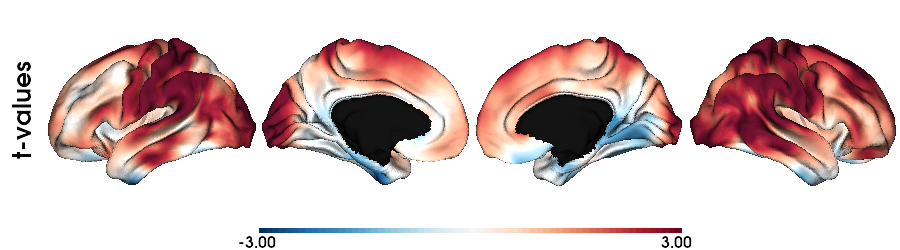

In [7]:
# CREATE the mixed effects model p> 0.01 (p>0.005 per tail) 
slm = mem_groups(Data=tauMK6240, df=df, Surf=fslr32k, mask=fslr32k_mask, Cthr=0.01, mem=True,  Pcorr="rft")

# Plot t-values
plot_ctx_slm(fslr32k_lh, fslr32k_rh, slm, color_range=(-3,3), Str='t-values', Save=False, Col="RdBu_r", mask=fslr32k_mask, scale=1 )


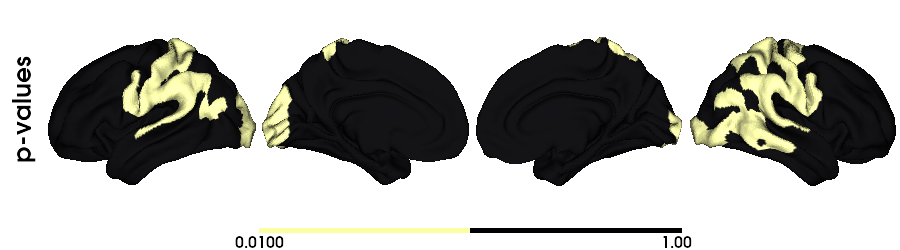

In [8]:
# p>0.025 Plot P-values
plot_ctx_pval(fslr32k_lh, fslr32k_rh, slm, Str='p-values', Save=False, Col="inferno_r", Thr=0.01, scale=1)


In [9]:
# Create a tval map variable
mk6240_tval_map = slm.t[0]

# Save it for Figure 2
np.save(f'{osf_path}/surf-fsLR-32k_desc-tvalues_MixedEffectsModel.npy', mk6240_tval_map)


### B.2 | Mean SUVR values for significant regions in each hemisphere by group

In [10]:
# significant values
thr=0.001
pvalues = np.copy(slm.P["pval"]["C"])

# Merge ipsi and contra
tauMK6240 = np.concatenate((mk_ipsi, mk_contra), axis=1)

# Binarize the significant values
pvalues_bin = np.where(pvalues < thr, 1, 0)

# Split the binarized pvalues in left and right hemispheres
pvalues_bin_ipsi = pvalues_bin[0:n_32k]
pvalues_bin_contra = pvalues_bin[n_32k:n_64k]

# Calculate the mean SIGNIFICANT cortical 18f-mk6240 SUVR
df['mk6240.sig'] = np.mean(tauMK6240[:, pvalues_bin == 1], axis=1)
df['mk6240.sig.ipsi'] = np.mean(mk_ipsi[:, pvalues_bin_ipsi == 1], axis=1)
df['mk6240.sig.contra'] = np.mean(mk_contra[:, pvalues_bin_contra == 1], axis=1)

# Calculate the mean cortical 18f-mk6240 SUVR
df['mk6240.mean'] = np.mean(tauMK6240, axis=1)
df['mk6240.mean.ipsi'] = np.mean(mk_ipsi, axis=1)
df['mk6240.mean.contra'] = np.mean(mk_contra, axis=1)

# Save the significant values on a csv
df.to_csv(f'{osf_path}/18F-MK6240_database.csv', sep=',', encoding='utf-8', index=False, header=True)

Ipsilateral t-value: 4.795
Ipsilateral p-value: 0.00001
Contralateral t-value: 4.606
Contralateral p-value: 0.00002


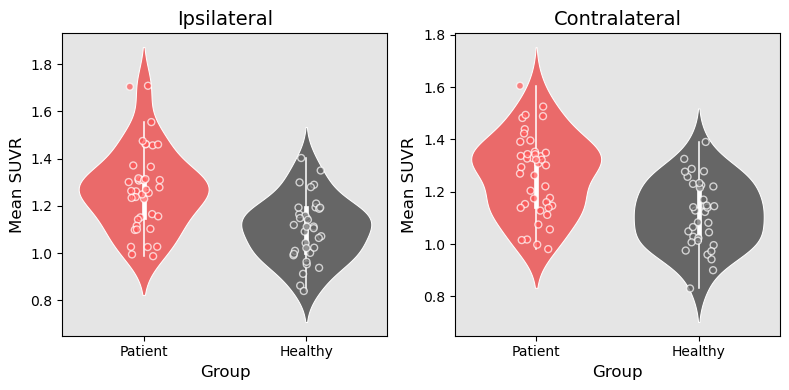

In [11]:
# Define the features and titles
features = ['mk6240.sig.ipsi', 'mk6240.sig.contra']
titles = ['Ipsilateral', 'Contralateral']

# Create a figure with two subplots
plt.figure(figsize=(8, 4))  # Adjust the width to fit two plots

# Loop over the features and titles to create the plots
for i, (feature, title) in enumerate(zip(features, titles)):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns, i+1 to select the subplot
    
    # Create violin plot with colored outlines and semi-transparent fill
    sns.violinplot(
        x="group", y=feature, data=df, order=["Patient", "Healthy"], linewidth=0.75, dodge=False,
        hue="group", fill=True, palette={"Patient": "#ff5555", "Healthy": "#666666"}, linecolor="white"
    )

    # Add jittered points (stripplot) with matching colors
    sns.stripplot(
        x="group", y=feature, data=df, jitter=True, order=["Patient", "Healthy"],
        hue="group", palette={"Patient": "#ff5555", "Healthy": "#666666"},
        alpha=0.7, dodge=False, edgecolor="white", linewidth=1, legend=False
    )

    # Set title and labels
    plt.title(title, fontsize=14)
    plt.xlabel("Group", fontsize=12)
    plt.ylabel("Mean SUVR", fontsize=12)

    # Set a lighter gray background (Gray 25: #dcdcdc)
    plt.gca().set_facecolor("#E5E5E5")

    # Perform t-test
    patients = df[df["group"] == "Patient"][feature]
    healthy = df[df["group"] == "Healthy"][feature]
    t_stat, p_value = ttest_ind(patients, healthy, equal_var=False)

    # Print t-test results
    print(f"{title} t-value: {t_stat:.3f}")
    print(f"{title} p-value: {p_value:.5f}")

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### C.1 | Subject-Wise Distribution of Cortical MK6240 Uptake
### C.1.a | Ridgeplot of TLE subjects

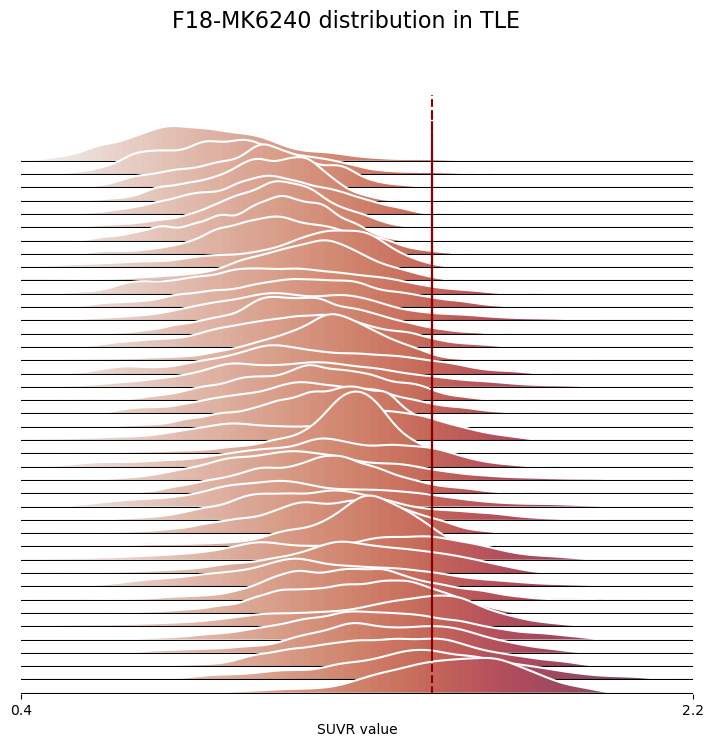

In [12]:
# Slice for the 'Patient' group
tauMK6240_tle = tauMK6240[df['group'] == 'Patient', :]

# Remove the medial wall from the data
tauMK6240_tle_masked = tauMK6240_tle[:, fslr32k_mask]

# Now plot using the filtered data
plot_ridgeplot(tauMK6240_tle_masked,
               title="F18-MK6240 distribution in TLE", 
               Range=(0.4, 2.2), Cmap='cmo.amp', Vline=1.5, save_path=f'{osf_path}/TLE_ridgeplot.png')


### C.1.b | Ridgeplot of Healthy controls

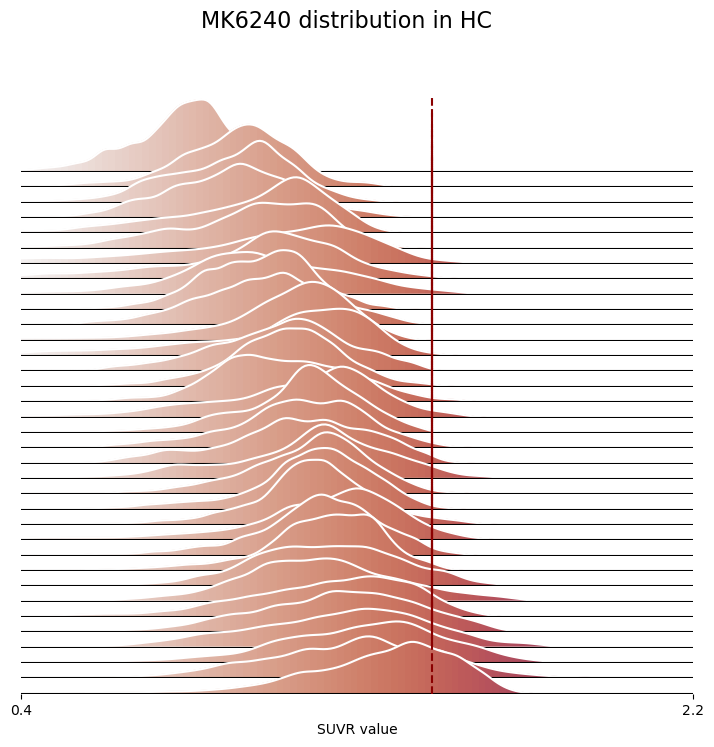

In [13]:
# Filter mk_matched for the 'Healthy' group
tauMK6240_control = tauMK6240[df['group'] == 'Healthy', :]

# Apply the thr_sig mask to select the appropriate columns
tauMK6240_control_masked = tauMK6240_control[:, fslr32k_mask]

# Now plot using the filtered data
plot_ridgeplot(tauMK6240_control_masked,
               title="MK6240 distribution in HC", 
               Range=(0.4, 2.2), Cmap='cmo.amp', Vline=1.5, save_path=f'{osf_path}/HC_ridgeplot.png')


### C.2   | Individual examples of of Cortical [$^{18}F$]-MK6240 Uptake

### C.2.a | TLE subjects

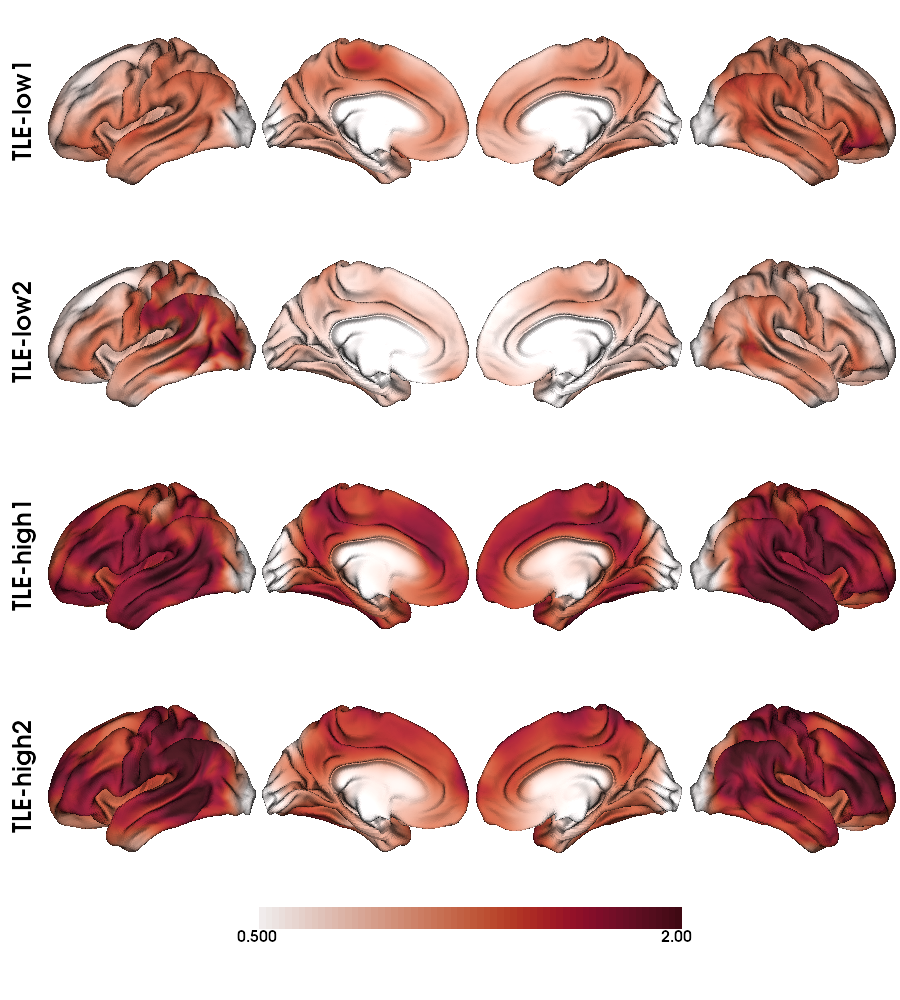

In [14]:
# Low 18F-mk6240
# AGE: 33yrs, DURATION 15yrs, ONSET: 18yrs | px09_01
# AGE: 52yrs, DURATION  2yrs, ONSET: 50yrs | px04_02

# High 18F-mk6240
# AGE: 45yrs, DURATION 38yrs, ONSET: 7yrs  | px10_01
# AGE: 25yrs, DURATION  8yrs, ONSET: 17yrs | px11_02
individual_tle = [
    tauMK6240[df.index[df['id'] == 'px08_01'][0],:],
    tauMK6240[df.index[df['id'] == 'px03_02'][0],:],
    tauMK6240[df.index[df['id'] == 'px09_01'][0],:],
    tauMK6240[df.index[df['id'] == 'px10_02'][0],:] ]

# Plot subjects
plot_hemispheres(fslr32k_lh, fslr32k_rh, array_name=individual_tle, size=(900, 1000),
                 color_bar='bottom', zoom=1.25, embed_nb=True,
                 interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(0.5, 2),
                 cmap='cmo.amp', transparent_bg=True, 
                 label_text=['TLE-low1', 'TLE-low2','TLE-high1', 'TLE-high2'],
                 screenshot=False, scale=1)


### C.2.b | Healthy controls

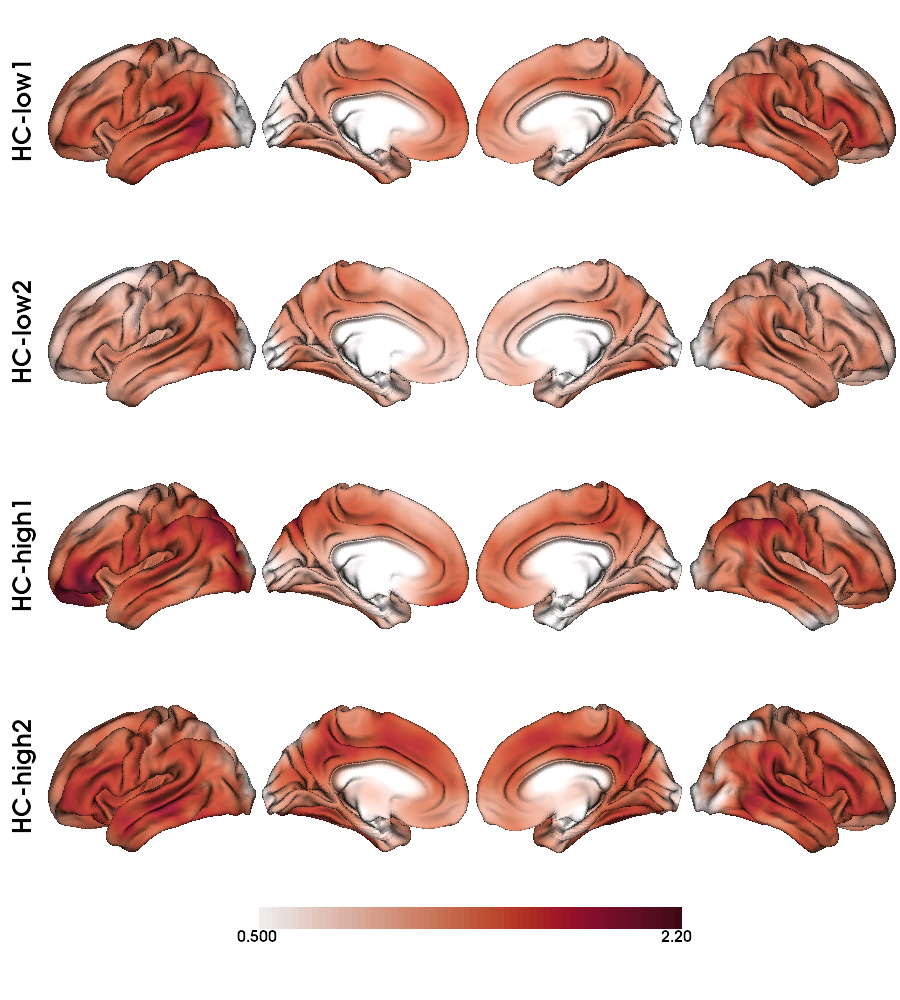

In [15]:
# Subset of subjects HC
individual_hc = [
    tauMK6240[df.index[df['id'] == 'hc14_01'][0],:],
    tauMK6240[df.index[df['id'] == 'hc01_02'][0],:],
    tauMK6240[df.index[df['id'] == 'hc12_02'][0],:],
    tauMK6240[df.index[df['id'] == 'hc02_01'][0],:]
          ]

# Plot subjects
plot_hemispheres(fslr32k_lh, fslr32k_rh, array_name=individual_hc, size=(900, 1000),
                 color_bar='bottom', zoom=1.25, embed_nb=True,
                 interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(0.5, 2.2),
                 cmap='cmo.amp', transparent_bg=True, 
                 label_text=['HC-low1', 'HC-low2', 'HC-high1', 'HC-high2'],
                 screenshot=False, scale=1)


---------------------
# Supplementary figures

## Cortical map of abnormal MK6240 SUVR probability

In [16]:
# Example: compute thresholds
thr_all_99   = np.percentile(tauMK6240[:, fslr32k_mask], 99)
thr_all_975  = np.percentile(tauMK6240[:, fslr32k_mask], 97.5)

thr_ctrl_99  = np.percentile(tauMK6240_control_masked, 99)
thr_ctrl_975 = np.percentile(tauMK6240_control_masked, 97.5)

# Build table
thr_tab = pd.DataFrame({
    "97.5th": [thr_all_975, thr_ctrl_975],
    "99th": [thr_all_99, thr_ctrl_99]
}, index=["All", "Controls"])

# Display nicely
display(thr_tab)


97.5th      99th
All       1.669186  1.787882
Controls  1.552129  1.628347

Percentile: 97.5 in controls is 1.552129444479942


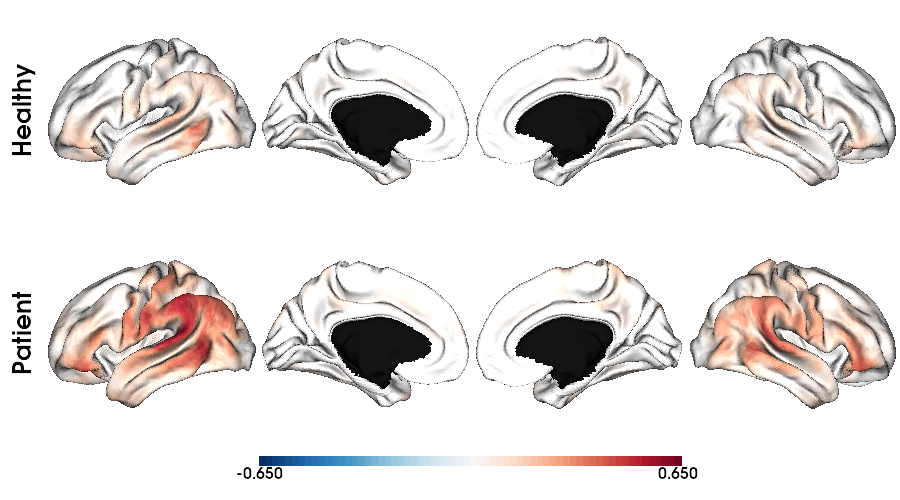

In [17]:
# Percentile based in the controls
thr = np.percentile(tauMK6240_control_masked, 97.5)
print(f"Percentile: 97.5 in controls is {thr}")

# Create a new matrix with values higher than 1.5 set to 1, rest set to 0
tauMK6240_bin = np.where(tauMK6240 > thr, 1, 0)

# plot data
plot_ctx_groups(fslr32k_lh, fslr32k_rh, tauMK6240_bin, df , color_range=(-0.65,0.65), 
                Save=False, Col='RdBu_r', mask=fslr32k_mask, scale=1)


## Group difference in cortical thickness

Y ~ group + age + sex + 1/subject


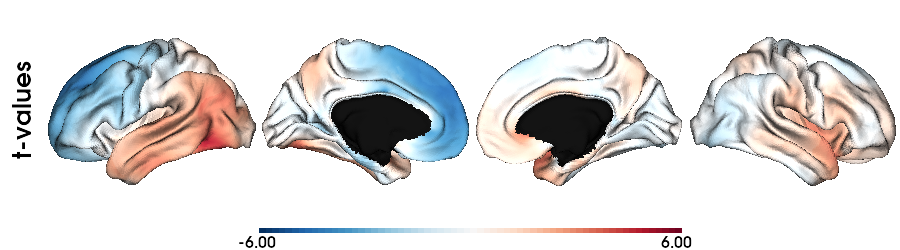

In [18]:
# p>0.025 CREATE the mixed effects model
slm_th = mem_groups(Data=thickness, df=df, Surf=fslr32k, mask=fslr32k_mask, Cthr=0.01, mem=True,  Pcorr="rft")

# Plot t-values
plot_ctx_slm(fslr32k_lh, fslr32k_rh, slm_th, color_range=(-6,6), Str='t-values', Col="RdBu_r", 
             mask=fslr32k_mask, scale=1 )


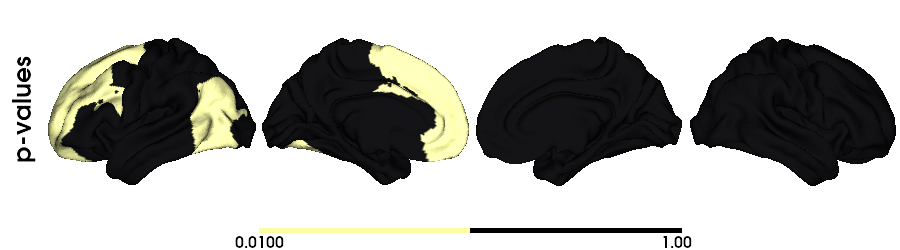

In [19]:
# p>0.025 Plot P-values
plot_ctx_pval(fslr32k_lh, fslr32k_rh, slm_th, Str='p-values', Col="inferno_r", Thr=0.01, scale=1)


## Group difference in MK6240 controlled by thickness

Y ~ group + age + sex + 1/subject


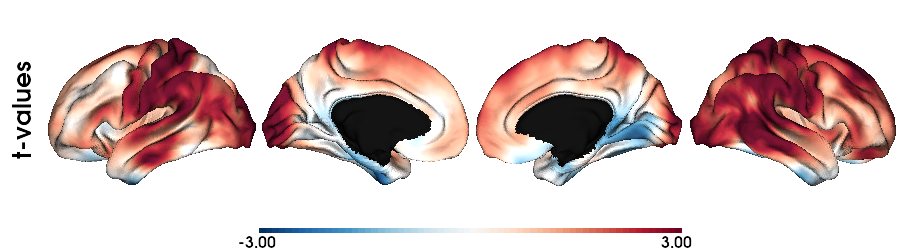

In [20]:
# -------------------------------
# Cortical 18F-MK6240~Thickness
tauMK6240_res = controlVertex(X=thickness, Y=tauMK6240)

# p>0.025 CREATE the mixed effects model
slm_mkth = mem_groups(Data=tauMK6240_res, df=df, Surf=fslr32k, mask=fslr32k_mask, Cthr=0.01, mem=True,  Pcorr="rft")

# Plot t-values
plot_ctx_slm(fslr32k_lh, fslr32k_rh, slm_mkth, color_range=(-3,3), Str='t-values', Col="RdBu_r", 
             mask=fslr32k_mask, scale=1)


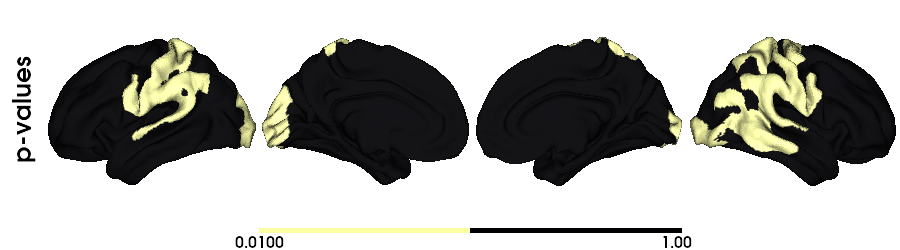

In [21]:
# p>0.025 Plot P-values
plot_ctx_pval(fslr32k_lh, fslr32k_rh, slm_mkth, Str='p-values', Col="inferno_r", Thr=0.01, scale=1)


## Mean longitudinal MK6240 by subject per group

See `Rmarkdown` document